In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [498]:
df = pd.read_csv('../DATA/heart.csv')

In [499]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [501]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [502]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [503]:
df.corr()['target'].sort_values(ascending=False).index

Index(['target', 'cp', 'thalach', 'slope', 'restecg', 'fbs', 'chol',
       'trestbps', 'age', 'sex', 'thal', 'ca', 'oldpeak', 'exang'],
      dtype='object')

<Axes: >

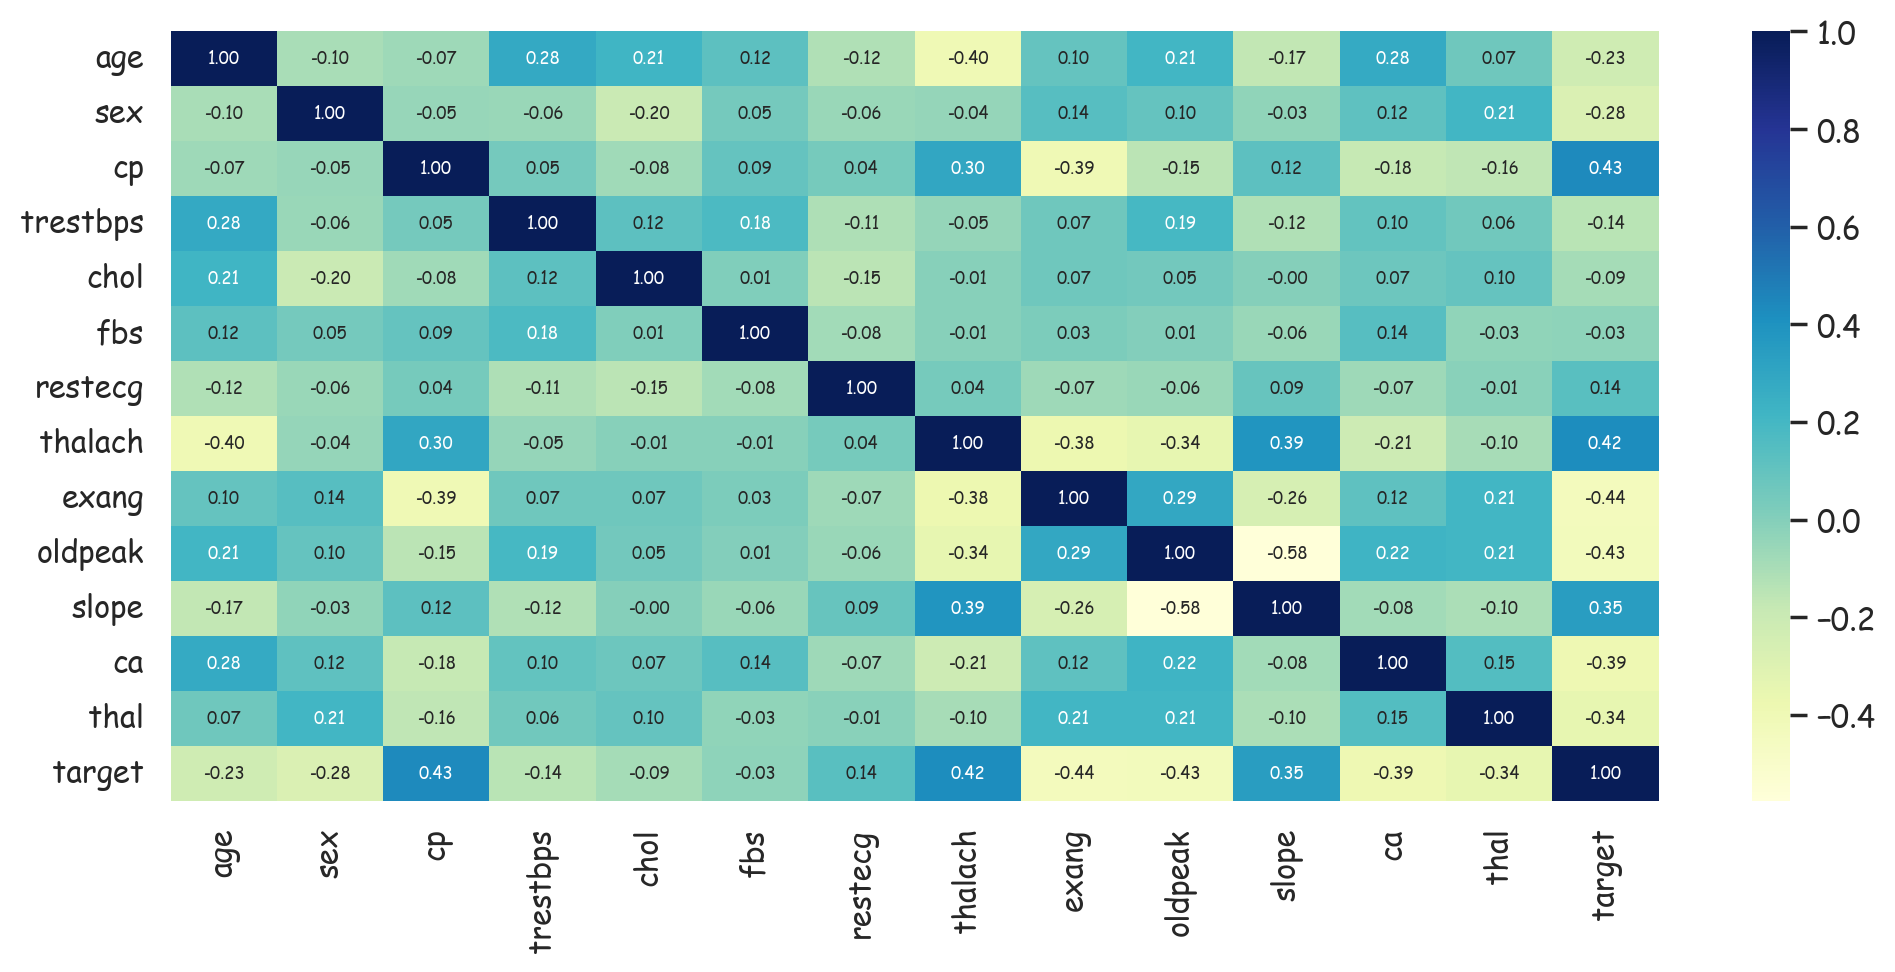

In [504]:
plt.figure(figsize=(12,5), dpi=200)
sns.set_theme(style='darkgrid', font='cursive')
sns.heatmap(df.corr(), 
            annot=True, 
            fmt='.2f', 
            linecolor='black',
            cmap='YlGnBu',
            annot_kws={"fontsize":6})

<Axes: xlabel='target', ylabel='count'>

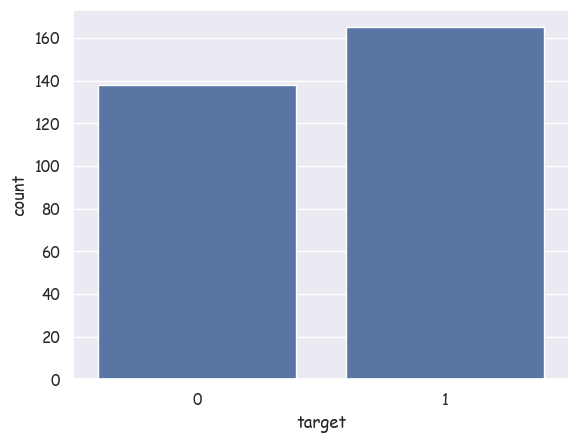

In [597]:
sns.countplot(data=df, x='target')

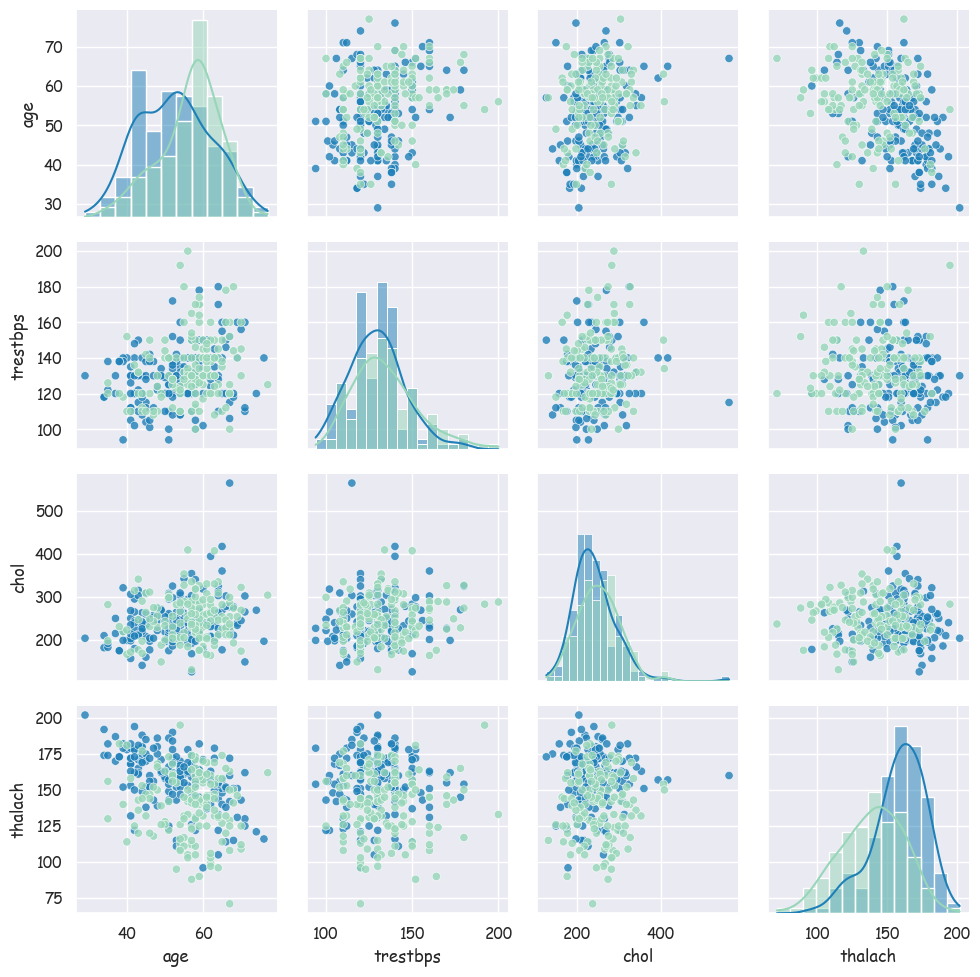

In [598]:
p = sns.PairGrid(df, vars=['age','trestbps', 'chol','thalach'], hue="target", palette='YlGnBu')
p = p.map_offdiag(sns.scatterplot, alpha=0.8)
p = p.map_diag(sns.histplot, kde=True)

In [507]:
X = df.drop(labels='target', axis=1)

In [508]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [509]:
y = df.target

In [510]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [599]:
from sklearn.model_selection import train_test_split

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [704]:
X_train.shape

(272, 13)

In [705]:
X_test.shape

(31, 13)

In [706]:
from sklearn.preprocessing import StandardScaler

In [707]:
scaler = StandardScaler()

In [708]:
scaler.fit(X_train)

StandardScaler()

In [709]:
scaled_X_train = scaler.transform(X_train)

In [710]:
scaled_X_train.mean()

3.667252524779929e-17

In [711]:
scaled_X_test = scaler.transform(X_test)

In [712]:
from sklearn.linear_model import LogisticRegression

In [713]:
logistic_model = LogisticRegression()

In [714]:
penalty = ['l1', 'l2']
C = np.logspace(-4, 1, 200)
param_grid = ({'penalty':penalty, 'C':C})
C

array([1.00000000e-04, 1.05956018e-04, 1.12266777e-04, 1.18953407e-04,
       1.26038293e-04, 1.33545156e-04, 1.41499130e-04, 1.49926843e-04,
       1.58856513e-04, 1.68318035e-04, 1.78343088e-04, 1.88965234e-04,
       2.00220037e-04, 2.12145178e-04, 2.24780583e-04, 2.38168555e-04,
       2.52353917e-04, 2.67384162e-04, 2.83309610e-04, 3.00183581e-04,
       3.18062569e-04, 3.37006433e-04, 3.57078596e-04, 3.78346262e-04,
       4.00880633e-04, 4.24757155e-04, 4.50055768e-04, 4.76861170e-04,
       5.05263107e-04, 5.35356668e-04, 5.67242607e-04, 6.01027678e-04,
       6.36824994e-04, 6.74754405e-04, 7.14942899e-04, 7.57525026e-04,
       8.02643352e-04, 8.50448934e-04, 9.01101825e-04, 9.54771611e-04,
       1.01163798e-03, 1.07189132e-03, 1.13573336e-03, 1.20337784e-03,
       1.27505124e-03, 1.35099352e-03, 1.43145894e-03, 1.51671689e-03,
       1.60705282e-03, 1.70276917e-03, 1.80418641e-03, 1.91164408e-03,
       2.02550194e-03, 2.14614120e-03, 2.27396575e-03, 2.40940356e-03,
      

In [715]:
from sklearn.model_selection import GridSearchCV

In [744]:
grid_model = GridSearchCV(estimator=logistic_model,
                          param_grid=param_grid, 
                          verbose=3)

In [745]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..............C=0.0001, penalty=l2;, score=0.545 total time=   0.0s
[CV 2/5] END ..............C=0.0001, penalty=l2;, score=0.545 total time=   0.0s
[CV 3/5] END ..............C=0.0001, penalty=l2;, score=0.556 total time=   0.0s
[CV 4/5] END ..............C=0.0001, penalty=l2;, score=0.556 total time=   0.0s
[CV 5/5] END ..............C=0.0001, penalty=l2;, score=0.537 total time=   0.0s
[CV 1/5] END .C=0.0001059560179277616, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .C=0.0001059560179277616, penalt

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.05956018e-04, 1.12266777e-04, 1.18953407e-04,
       1.26038293e-04, 1.33545156e-04, 1.41499130e-04, 1.49926843e-04,
       1.58856513e-04, 1.68318035e-04, 1.78343088e-04, 1.88965234e-04,
       2.00220037e-04, 2.12145178e-04, 2.24780583e-04, 2.38168555e-04,
       2.52353917e-04, 2.67384162e-04, 2.83309610e-0...
       2.64308149e+00, 2.80050389e+00, 2.96730241e+00, 3.14403547e+00,
       3.33129479e+00, 3.52970730e+00, 3.73993730e+00, 3.96268864e+00,
       4.19870708e+00, 4.44878283e+00, 4.71375313e+00, 4.99450512e+00,
       5.29197874e+00, 5.60716994e+00, 5.94113398e+00, 6.29498899e+00,
       6.66991966e+00, 7.06718127e+00, 7.48810386e+00, 7.93409667e+00,
       8.40665289e+00, 8.90735464e+00, 9.43787828e+00, 1.00000000e+01]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [746]:
grid_model.best_params_

{'C': 0.04605922041145108, 'penalty': 'l2'}

In [747]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [748]:
y_logic_pred = grid_model.predict(scaled_X_test)

In [749]:
y_logic_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [756]:
grid_model.best_estimator_.coef_

array([[-0.09622355, -0.39341976,  0.53398722, -0.13809608, -0.0879821 ,
         0.02476348,  0.08068464,  0.29864053, -0.33389806, -0.35166446,
         0.25055133, -0.49603666, -0.37364776]])

In [752]:
coefs = grid_model.best_estimator_.coef_.copy()

In [755]:
coefs.sort()
coefs

array([[-0.49603666, -0.39341976, -0.37364776, -0.35166446, -0.33389806,
        -0.13809608, -0.09622355, -0.0879821 ,  0.02476348,  0.08068464,
         0.25055133,  0.29864053,  0.53398722]])

C:\Users\Булат\AppData\Local\Temp\ipykernel_5216\3205129715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=coefs.flatten(), palette='magma')


Text(0.5, 0, 'Coefficients')

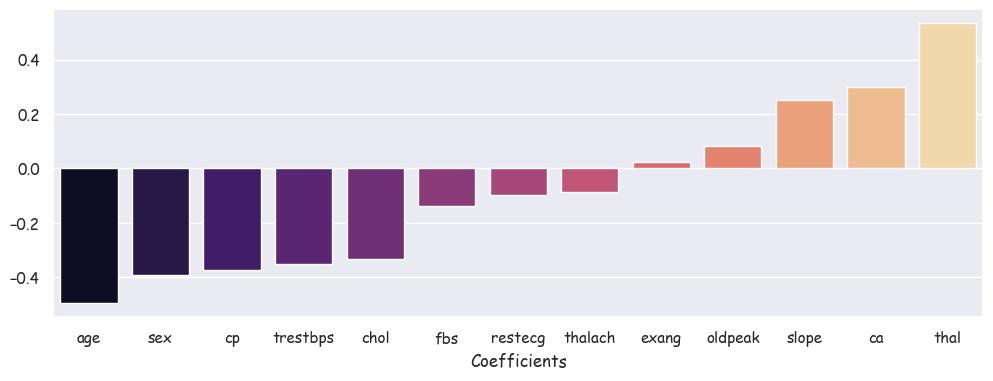

In [757]:
plt.figure(figsize=(12,4), dpi=100)
sns.barplot(x=X.columns, y=coefs.flatten(), palette='magma')
plt.xlabel('Coefficients')

In [758]:
confusion_matrix(y_test, y_logic_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

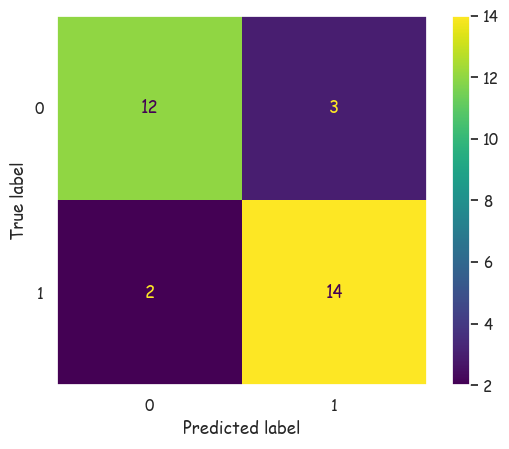

In [759]:
ConfusionMatrixDisplay.from_predictions(y_test, y_logic_pred)
plt.grid(False)

In [760]:
print(classification_report(y_test, y_logic_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [761]:
accuracy_score(y_test, y_logic_pred)

0.8387096774193549

In [762]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [763]:
grid_model.predict_log_proba(scaled_X_test)

array([[-0.02609874, -3.65888913],
       [-1.37562444, -0.29126416],
       [-1.03882952, -0.43675244],
       [-2.53280374, -0.08276874],
       [-0.07191443, -2.66802014],
       [-1.65096213, -0.21302643],
       [-2.01358776, -0.14330334],
       [-0.06078266, -2.83068812],
       [-0.10410137, -2.3139893 ],
       [-1.25263646, -0.33652285],
       [-0.08456085, -2.51226637],
       [-1.19804923, -0.3592244 ],
       [-0.13667655, -2.05769811],
       [-0.57148947, -0.83168246],
       [-1.67659347, -0.20703641],
       [-1.43948486, -0.27056257],
       [-2.91554105, -0.05569741],
       [-1.15782827, -0.37712218],
       [-1.53755929, -0.24195053],
       [-0.06075822, -2.83107818],
       [-0.04153298, -3.20196211],
       [-0.90140026, -0.52087723],
       [-0.93635914, -0.497667  ],
       [-1.19035232, -0.36256957],
       [-0.63419141, -0.75579769],
       [-2.17541306, -0.12054323],
       [-0.06619119, -2.74812101],
       [-1.26223408, -0.33270877],
       [-0.08618135,

In [764]:
grid_model.best_estimator_

LogisticRegression(C=0.04605922041145108)

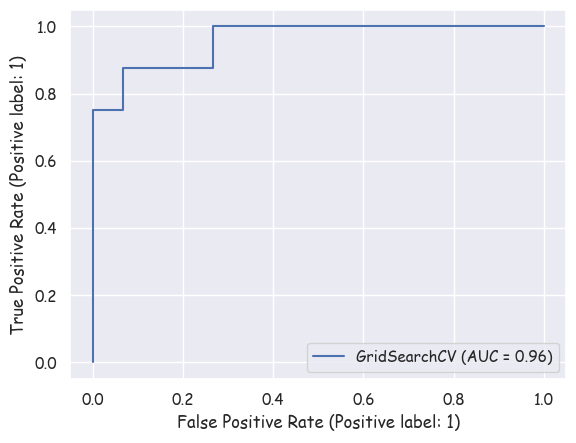

In [765]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(grid_model, scaled_X_test, y_test, ax=ax)

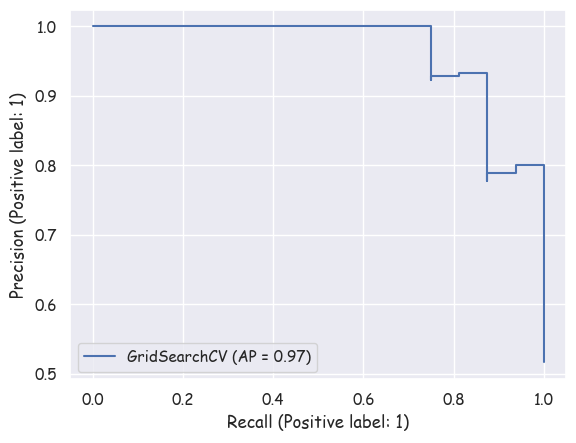

In [766]:
PrecisionRecallDisplay.from_estimator(grid_model, scaled_X_test, y_test)

In [767]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [768]:
patient

[[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]

In [769]:
grid_model.predict(scaler.transform(patient))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [770]:
grid_model.predict_proba(scaler.transform(patient))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.94717147, 0.05282853]])

In [771]:
from sklearn.linear_model import LogisticRegressionCV

In [772]:
model = LogisticRegressionCV()

In [773]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [774]:
y_pred = model.predict(scaled_X_test)

In [546]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

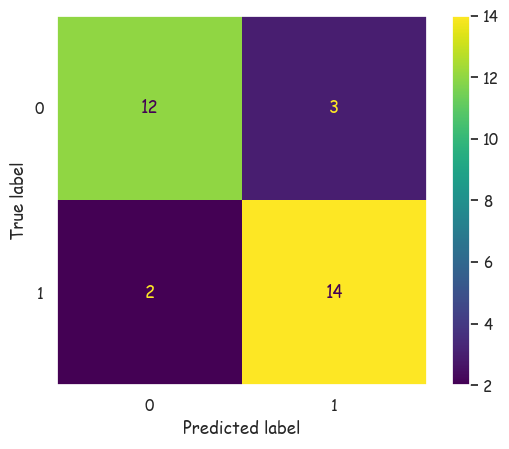

In [547]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.grid(False)

In [548]:
accuracy_score(y_test, y_pred)

0.8387096774193549

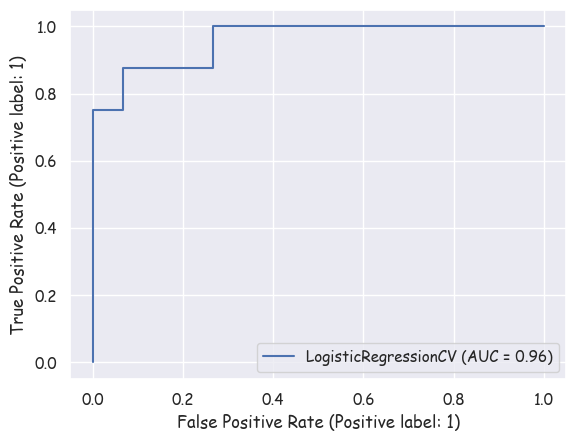

In [549]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(model, scaled_X_test, y_test, ax=ax)